# Proyecto 3: Predicción de precios de propiedades

¡Bienvenidos al tercer proyecto de la carrera de Data Science de Acamica! 

En este proyecto vamos a seguir trabajando con el dataset de propiedades en venta publicadas en el portal [Properati](www.properati.com.ar). El objetivo en este caso armar nuestros primeros modelos para predecir el precio de las propiedades en dólares.

Las columnas que se agregan son:

* `barrios_match`: si coincide el barrio publicado con el geográfico vale 1, si no 0.

* `PH`, `apartment`, `house`: variables binarias que indican el tipo de propiedad.

* dummies de barrios: variables binarias con 1 o 0 según el barrio.

La métrica que vamos a usar para medir es RMSE (raíz del error cuadrático medio), cuya fórmula es:

$$RMSE = \sqrt{\frac{\sum_{t=1}^n (\hat y_t - y_t)^2}{n}}$$

In [1]:
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.3f' % x)
path_dataset = 'datos_properati_limpios_model.csv'
df = pd.read_csv(path_dataset)

In [2]:
print("El dataset que vamos a trabajar aquí tiene {} observaciones".format(df.shape[0]))

El dataset que vamos a trabajar aquí tiene 6376 observaciones


In [3]:
df.head()

lat     lon  price_aprox_usd  surface_total_in_m2  \
0 -34.589 -58.417       170000.000               40.000   
1 -34.591 -58.418        90000.000               27.000   
2 -34.587 -58.437       150000.000               44.000   
3 -34.593 -58.428       154000.000               58.000   
4 -34.593 -58.428       154000.000               58.000   

   surface_covered_in_m2  rooms  barrio_match  PH  apartment  house  ...  \
0                 38.000      1             1   0          1      0  ...   
1                 27.000      1             1   0          1      0  ...   
2                 44.000      1             1   0          1      0  ...   
3                 58.000      2             1   1          0      0  ...   
4                 58.000      3             1   1          0      0  ...   

   VILLA LUGANO  VILLA LURO  VILLA ORTUZAR  VILLA PUEYRREDON  VILLA REAL  \
0             0           0              0                 0           0   
1             0           0              0                 0           0   
2             0           0              0                 0           0   
3             0           0              0                 0           0   
4             0           0              0                 0           0   

   VILLA RIACHUELO  VILLA SANTA RITA  VILLA SOLDATI  VILLA URQUIZA  \
0                0                 0              0              0   
1                0                 0              0              0   
2                0                 0              0              0   
3                0                 0              0              0   
4                0                 0              0              0   

   outlier_price_m2  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0  

[5 rows x 59 columns]

In [4]:
df.describe()

lat      lon  price_aprox_usd  surface_total_in_m2  \
count 6376.000 6376.000         6376.000             6376.000   
mean   -34.605  -58.438       120950.254               83.700   
std      0.026    0.041        31336.842             1514.271   
min    -34.695  -58.529        60529.000                0.000   
25%    -34.623  -58.470        95000.000               40.000   
50%    -34.606  -58.436       120000.000               51.000   
75%    -34.590  -58.404       145815.000               70.000   
max    -34.536  -58.353       179999.000           120000.000   

       surface_covered_in_m2    rooms  barrio_match       PH  apartment  \
count               6376.000 6376.000      6376.000 6376.000   6376.000   
mean                  73.721    2.315         0.690    0.094      0.882   
std                 1508.456    0.942         0.463    0.292      0.323   
min                    1.000    1.000         0.000    0.000      0.000   
25%                   36.000    2.000         0.000    0.000      1.000   
50%                   46.000    2.000         1.000    0.000      1.000   
75%                   60.000    3.000         1.000    0.000      1.000   
max               120000.000   10.000         1.000    1.000      1.000   

         house  ...  VILLA LUGANO  VILLA LURO  VILLA ORTUZAR  \
count 6376.000  ...      6376.000    6376.000       6376.000   
mean     0.024  ...         0.009       0.012          0.009   
std      0.152  ...         0.096       0.110          0.096   
min      0.000  ...         0.000       0.000          0.000   
25%      0.000  ...         0.000       0.000          0.000   
50%      0.000  ...         0.000       0.000          0.000   
75%      0.000  ...         0.000       0.000          0.000   
max      1.000  ...         1.000       1.000          1.000   

       VILLA PUEYRREDON  VILLA REAL  VILLA RIACHUELO  VILLA SANTA RITA  \
count          6376.000    6376.000         6376.000          6376.000   
mean              0.013       0.003            0.002             0.007   
std               0.111       0.059            0.040             0.086   
min               0.000       0.000            0.000             0.000   
25%               0.000       0.000            0.000             0.000   
50%               0.000       0.000            0.000             0.000   
75%               0.000       0.000            0.000             0.000   
max               1.000       1.000            1.000             1.000   

       VILLA SOLDATI  VILLA URQUIZA  outlier_price_m2  
count       6376.000       6376.000          6376.000  
mean           0.001          0.031             0.000  
std            0.031          0.172             0.000  
min            0.000          0.000             0.000  
25%            0.000          0.000             0.000  
50%            0.000          0.000             0.000  
75%            0.000          0.000             0.000  
max            1.000          1.000             0.000  

[8 rows x 59 columns]

El objetivo de este proyecto es poder trabajar en el ajuste de modelos y su posterior evaluación.

Para empezar vamos a separar el `dataset` en un conjunto de entrenamiento (80%) y un conjunto de test (20%). 

**Separá el dataset** en `X_train`, `X_test`, `y_train` e `y_test` con el tamaño correspondiente

In [5]:
X = df.drop(['price_aprox_usd'], axis=1)
y = df['price_aprox_usd']

# Realizá la separación a continuación en esta celda
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 28)

In [6]:
#Valido que los tamaños de las muestras y las pruebas sean igual entre ellos
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(5100, 58)
(5100,)
(1276, 58)
(1276,)


## Árboles de decisión

Lo primero que vamos a hacer es entrenar un árbol de decisión y usar de métrica al `RMSE`. 

Para poder obtener el **RMSE** vamos a medir el `mean_squared_error` y obtener su raíz cuadrada. 

**Importá** `DecisionTreeRegressor` desde `sklearn.tree`.  

A continuación **entrená** el regresor con el conjunto de training


In [7]:
# En esta celda cargá el regresor y realizá el entrenamiento
from sklearn.tree import DecisionTreeRegressor
max_depth = 2
tree = DecisionTreeRegressor(criterion = 'mse', max_depth = max_depth, random_state = 28)
tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2, random_state=28)

Con el modelo entrenado **realizá la predicción** sobre el conjunto de test `X_test` y guardá el resultado en una variable `y_pred`.

In [8]:
# Acá realizá la predicción
y_pred = tree.predict(X_test)
y_train_pred = tree.predict(X_train)

**Calculá el rmse** sacando la raíz cuadrada de `mean_squared_error` entre `y_test` e `y_pred` y **mostrá** el resultado

In [9]:
# En esta celda calculá el rmse
import numpy as np
from sklearn.metrics import mean_squared_error
print('Error en datos de test:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('Error en datos de train:', np.sqrt(mean_squared_error(y_train, y_train_pred)))

Error en datos de test: 24530.339816004664
Error en datos de train: 24991.58746743765


__Analizar el cambio en el RMSE a medida que es más profundo el árbol de decisión, tanto en training como en testing.__

Para esto, **iterá** de 5 en 5 en el parámetro `max_depth` y **observá** como impacta en el RMSE. 

**Creá** dos arreglos `rmses_train` y `rmses_test` para ir guardando los **rmse** de cada profundidad

In [10]:
rmses_train = []
rmses_test = []

max_depth = np.arange(5, 101, 5).tolist()

for m in max_depth:
    # modelo con el valor de profundidad deseado
    tree = DecisionTreeRegressor(criterion = 'mse', max_depth = m, random_state = 28)
    
    #entrenar modelo
    tree.fit(X_train, y_train)
    
    #Predigo y evaluo sobre set de entrenamiento
    y_train_pred = tree.predict(X_train)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    
    #Predigo y evaluo sobre set de test
    y_pred = tree.predict(X_test)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
    
    rmses_train.append(rmse_train)
    rmses_test.append(rmse_test)

In [11]:
rmses_train

[21377.833381411103,
 15598.264786049682,
 8439.75577314965,
 3899.53425397191,
 1192.0863901618404,
 548.208069576707,
 545.3379919440019,
 545.3379919440019,
 545.3379919440019,
 545.3379919440019,
 545.3379919440019,
 545.3379919440019,
 545.3379919440019,
 545.3379919440019,
 545.3379919440019,
 545.3379919440019,
 545.3379919440019,
 545.3379919440019,
 545.3379919440019,
 545.3379919440019]

In [12]:
rmses_test

[21143.592233751464,
 21227.217017477284,
 23323.473904211034,
 24388.907533796988,
 24714.65196467419,
 24920.246153274602,
 24793.62087527836,
 24793.62087527836,
 24793.62087527836,
 24793.62087527836,
 24793.62087527836,
 24793.62087527836,
 24793.62087527836,
 24793.62087527836,
 24793.62087527836,
 24793.62087527836,
 24793.62087527836,
 24793.62087527836,
 24793.62087527836,
 24793.62087527836]

Ahora graficamos los valores que guardamos en los arreglos `rmses_train` y `rmses_test`

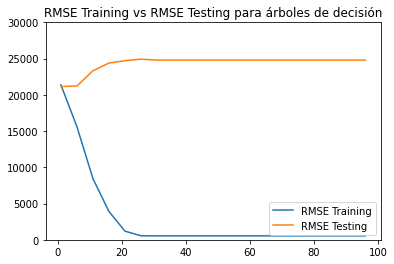

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline 
plt.plot(range(1,100, 5), rmses_train, label='RMSE Training')
plt.plot(range(1,100, 5), rmses_test, label='RMSE Testing')
plt.ylim((0, 30000))
plt.legend(loc="best")
plt.title("RMSE Training vs RMSE Testing para árboles de decisión")
plt.show()

Podemos ver aquí como el modelo presenta sobreajuste dado que a mayor complejidad (en este caso, mayor profundidad del árbol) más diferencia entre los resultados de training y testing. También observamos como la curva de testing decrece y luego vuelvo a crecer. El punto donde se minimiza está relacionado con el tradeoff entre sesgo y varianza que vamos a ver en la próxima unidad.

## KNN

**Entrená un knn** y nuevamente medir el **rmse** en el conjunto de testing


In [14]:
# Realizá el entrenamiento y el cálculo de rmse en esta celda
from sklearn.neighbors import KNeighborsRegressor
n_neighbors = 2
rgsr = KNeighborsRegressor(n_neighbors = n_neighbors)
rgsr.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=2)

In [15]:
# Predicción
y_kpred = rgsr.predict(X_test)
y_ktrain_pred = rgsr.predict(X_train)

In [16]:
from sklearn.metrics import mean_squared_error
print('Error en datos de test:', np.sqrt(mean_squared_error(y_test, y_kpred)))
print('Error en datos de train:', np.sqrt(mean_squared_error(y_train, y_ktrain_pred)))

Error en datos de test: 24439.025145226282
Error en datos de train: 13942.309368192857


__Analizar el cambio en el RMSE a medida que consideramos más vecinos para KNN, tanto en training como en testing.__

Para esto, **iterá** incrementando de a uno el parámetro `n_neighbors` y **observá** como impacta en el RMSE. 

**Creá** dos arreglos `rmses_train` y `rmses_test` para ir guardando los **rmse** de cada profundidad

In [17]:
# Calculá los cambio en el rmse en esta celda
rmses_ktrain = []
rmses_ktest = []

n_neighbors = np.arange(1, 101, 1).tolist()

#Genero un loop para pasar por los distintos valores de max_depth
for k in n_neighbors:
    
    # modelo con el valor de profundidad deseado
    rgsr = KNeighborsRegressor(n_neighbors = k)
    
    #Entreno el modelo
    rgsr.fit(X_train, y_train)
    
    #Predigo y evaluo sobre set de entrenamiento
    y_ktrain_pred = rgsr.predict(X_train)
    rmse_ktrain = np.sqrt(mean_squared_error(y_train, y_ktrain_pred))
    
    #Predigo y evaluo sobre set de test
    y_kpred = rgsr.predict(X_test)
    rmse_ktest = np.sqrt(mean_squared_error(y_test, y_kpred))
    
    rmses_ktrain.append(rmse_ktrain)
    rmses_ktest.append(rmse_ktest)

In [18]:
rmses_ktrain

[766.5755650050066,
 13942.309368192857,
 16499.77692707798,
 17930.54994966868,
 18737.20023607038,
 19391.91507321246,
 19854.689146167275,
 20153.13913420007,
 20468.366373035708,
 20653.322909253107,
 20817.799629433703,
 21024.259570535603,
 21174.592534639705,
 21327.69691678757,
 21417.358527706707,
 21516.093768825245,
 21661.68471405486,
 21759.77449811872,
 21826.298073434373,
 21898.05020617147,
 21995.208683171524,
 22086.142390790832,
 22168.496067467164,
 22239.197851832338,
 22312.051280284883,
 22365.867199696924,
 22436.64932974848,
 22490.60072150736,
 22527.62390222264,
 22581.991745005947,
 22618.39216509353,
 22637.99695144777,
 22657.534571855693,
 22686.22320836929,
 22717.218010010045,
 22750.223149693873,
 22797.252626436402,
 22832.786866978702,
 22849.916127325,
 22895.29669592382,
 22926.26893049696,
 22934.782440621704,
 22969.44012700477,
 22982.664185853566,
 23010.107698241194,
 23022.154294351054,
 23040.24611775923,
 23058.30429758492,
 23067.665543653

In [19]:
rmses_ktest

[27206.876457203904,
 24439.025145226282,
 23733.602069619134,
 23385.619891394377,
 22952.23824511178,
 22701.180063665684,
 22682.980394564805,
 22784.00645298159,
 22833.701979576563,
 22960.51171195009,
 22981.83556464712,
 22994.645543372797,
 22949.9036494295,
 22964.885804549744,
 22972.97535413193,
 22988.704472567417,
 23049.566803800117,
 23085.080496925966,
 23102.65920789793,
 23128.464008085444,
 23175.943876042114,
 23205.653230397063,
 23195.121669035838,
 23176.94910222788,
 23242.879682570285,
 23292.944043802945,
 23322.10485947024,
 23356.070738432045,
 23312.65837650046,
 23335.84053345418,
 23380.70513387377,
 23393.3790086262,
 23413.788865011826,
 23423.642416288938,
 23408.832335570944,
 23422.57103561903,
 23395.173968368028,
 23383.5955956709,
 23402.70915516298,
 23391.847362416647,
 23410.63890604414,
 23448.904756726293,
 23463.27516287486,
 23473.259282996776,
 23490.020631785253,
 23518.466234132717,
 23545.026038545984,
 23565.2683509233,
 23571.42405900

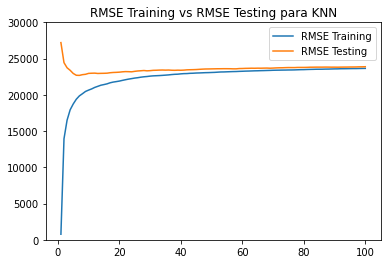

In [20]:
plt.plot(range(1,101, 1), rmses_ktrain, label='RMSE Training')
plt.plot(range(1,101, 1), rmses_ktest, label='RMSE Testing')
plt.ylim((0, 30000))
plt.legend(loc="best")
plt.title("RMSE Training vs RMSE Testing para KNN")
plt.show()

**Calcular el RMSE promedio del resultado de cross validation para un árbol de decisión. 
Como parámetros deberás usar:**
- 10 folds
- profundidad 5
- scoring neg_mean_squared_error.

El árbol de decisión guardalo en una variable llamada `regressor` para poder reutilizarla luego.

Atención: `cross_validation_score` de `scikit-learn` usá la métrica `neg_mean_squared_error` (NMSE) en vez de `mean_square_error` (MSE). 

`NMSE` es lo mismo que `MSE` pero con un signo negativo. 

Como nosotros queremos obtener el `MSE` para calcular sobre él el `RMSE`, vamos a definir un método `nmsq2rmse` para hacer esa conversión de `NMSE` a `MSE`
.

In [21]:
regressor = DecisionTreeRegressor(max_depth = 5)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5)

In [22]:
# Calculá en esta celda los cross_val_score
from sklearn.model_selection import cross_val_score
regressor_score = cross_val_score(regressor, X_train, y_train, scoring='neg_mean_squared_error', cv=10)

In [23]:
regressor_score

array([-5.05612792e+08, -4.81293620e+08, -5.18622752e+08, -4.79791991e+08,
       -5.03053027e+08, -4.51989470e+08, -4.88823151e+08, -5.18794405e+08,
       -4.82933173e+08, -5.77405730e+08])

In [24]:
regressor_score.mean()

-500832011.0514015

In [25]:
def nmsq2rmse(score):
    return np.sqrt(-score)

In [26]:
nmsq2rmse(regressor_score)

array([22485.8353604 , 21938.40514817, 22773.2903154 , 21904.15465416,
       22428.84363968, 21260.04396931, 22109.34533009, 22777.05874111,
       21975.74056037, 24029.26818949])

Para ver el resultado final, reentrenamos al regresor y mostramos en un dataframe la comparación entre los valores reales, los predichos y su diferencia

In [27]:
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
val_real = pd.Series(y_test.values)
val_pred = pd.Series(y_pred)

In [28]:
predicciones = pd.concat([val_real.rename('Valor real'),val_pred.rename('Valor Pred') ,abs(val_real-val_pred).rename('Dif(+/-)')] ,  axis=1)

In [29]:
predicciones.head(10)

Valor real  Valor Pred  Dif(+/-)
0   84000.000  114444.698 30444.698
1   76000.000   80727.827  4727.827
2  120000.000  126242.268  6242.268
3   90000.000   99117.559  9117.559
4   85000.000  125287.745 40287.745
5  130000.000  138624.569  8624.569
6   80000.000   84189.282  4189.282
7  120000.000  126242.268  6242.268
8  100000.000  110398.478 10398.478
9  165000.000  147589.348 17410.652